In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.feature import hog
from skimage import exposure
import os
import cv2
import numpy as np
from skimage import io, color, feature, exposure
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.metrics import precision_recall_curve 
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_curve 
from sklearn.metrics import auc 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import zero_one_loss
from sklearn.metrics import confusion_matrix
from IPython.display import Image

In [24]:


# Path to your dataset directory
dataset_path = 'E:\\Desktop\\new image data-set\\images'

# Function to load images and labels
def load_dataset(dataset_path):
    images = []
    labels = []
    class_names = sorted(os.listdir(dataset_path))
    label_dict = {class_name: idx for idx, class_name in enumerate(class_names)}

    for class_name in class_names:
        class_path = os.path.join(dataset_path, class_name)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (224, 224))  # Resize if needed
            images.append(img)
            labels.append(label_dict[class_name])

    return np.array(images), np.array(labels)

# Load the dataset and labels
images, labels = load_dataset(dataset_path)

# Check shapes and labels
print("Images shape:", images.shape)
print("Labels shape:", labels.shape)



Images shape: (952, 224, 224, 3)
Labels shape: (952,)


In [25]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [26]:
# Reshape the 4D array to a 2D array
num_samples, height, width, channels = x_train.shape

In [27]:
# Flatten each image into a single dimension
x_train_reshaped = x_train.reshape(num_samples, height * width * channels)


In [28]:
# kMean is unsupervised learning (clustering)
k=5

kMeans_model=KMeans(n_clusters=k,init="k-means++",n_init=10, random_state=45)

kMeans_model.fit(x_train_reshaped)

C:\Users\Zyad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


KMeans(n_clusters=5, n_init=10, random_state=45)

In [29]:
kmean_centroid=kMeans_model.cluster_centers_
kmean_centroid # there is clusters

array([[ 73.13178295,  85.76744186,  99.73643411, ..., 136.96899225,
        144.07751938, 154.15503876],
       [ 94.45454545, 114.83916084, 118.62237762, ...,  65.90909091,
         86.1958042 ,  93.86713287],
       [140.13675214, 147.30769231, 152.18803419, ..., 126.63247863,
        133.95726496, 142.05982906],
       [ 71.45098039,  78.30392157,  79.3627451 , ...,  90.98039216,
         96.19607843,  96.7745098 ],
       [ 43.47428571,  49.67428571,  53.37142857, ...,  59.78285714,
         67.01142857,  76.45714286]])

In [30]:
normalized_centroids = kMeans_model.cluster_centers_ / 255.0  # Normalize pixel values


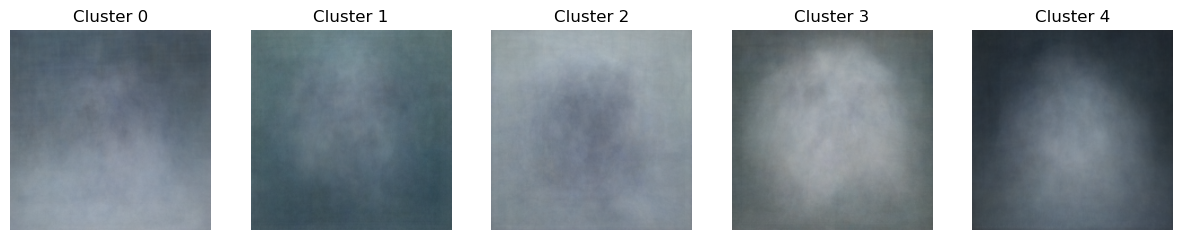

In [31]:
n_clusters = 5

fig, ax = plt.subplots(1, n_clusters, figsize=(15, 3))

for i in range(n_clusters):
    # Reshape each centroid to (224, 224, 3) for visualization
    center_image = normalized_centroids[i].reshape(224, 224, 3)
    ax[i].imshow(center_image)
    ax[i].axis('off')
    ax[i].set_title(f'Cluster {i}')

plt.show()


In [32]:
# Reshape x_test to have two dimensions
num_samples_test, height_test, width_test, channels_test = x_test.shape
x_test_reshaped = x_test.reshape(num_samples_test, height_test * width_test * channels_test)


In [33]:
# Predict using reshaped x_test
y_kmean_pred = kMeans_model.predict(x_test_reshaped)

In [34]:
accuracy = accuracy_score(y_kmean_pred, y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.18181818181818182


In [35]:
# Evaluate silhouette score
silhouette_avg = silhouette_score(x_test_reshaped, y_kmean_pred)
print(f"Silhouette Score: {silhouette_avg}")

# Evaluate Davies-Bouldin score
db_score = davies_bouldin_score(x_test_reshaped, y_kmean_pred)
print(f"Davies-Bouldin Score: {db_score}")


Silhouette Score: 0.061699429101101474
Davies-Bouldin Score: 2.9206120009377674


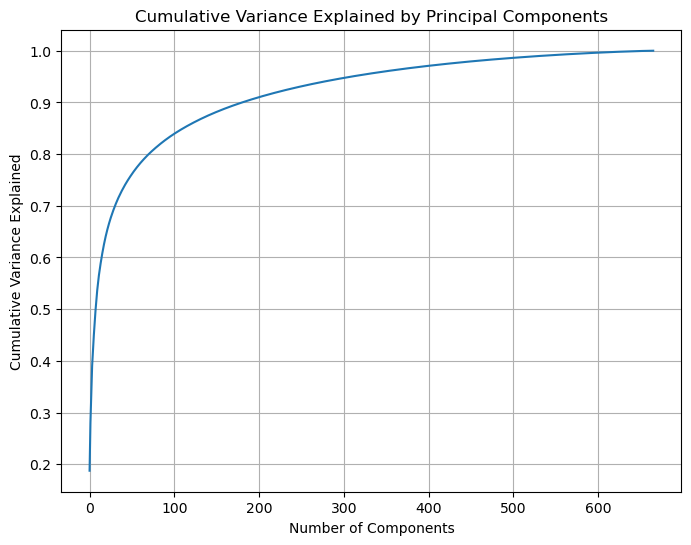

In [17]:
# Compute PCA
pca = PCA().fit(x_train_reshaped)

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.grid(True)
plt.show()


C:\Users\Zyad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Zyad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Zyad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Zyad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows wi

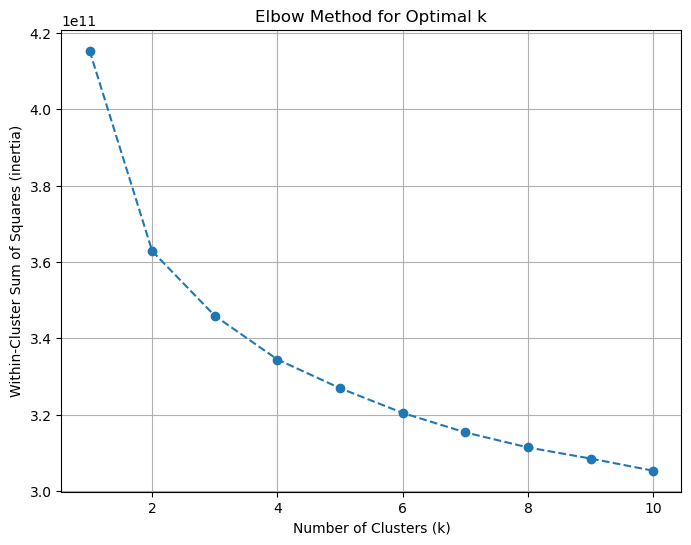

In [21]:
# Calculate the within-cluster sum of squares (WCSS) for different values of k
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=45)
    kmeans.fit(x_train_reshaped)
    inertia.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (inertia)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [23]:
inertia[0]


415316062447.3274